# Data _Nebula_ Visualization
## Exoplanet Dataset from Nasa!

## Download the original dataset.

[Download the CSV file.](./dataset/exoplanet_dataset.csv)


## Completed Version

If you would like to skip to the completed data visualization, please see the following links, although I think it was quite interesting, particularly calculating the gravitational constant!

[View here - hosted on Microsoft servers](https://app.powerbi.com/view?r=eyJrIjoiYWE2NDc5NjYtYzU4OC00N2ViLTg5MzktNDIzNTliMjk5Zjk2IiwidCI6IjNiN2IzYmM0LWQyNWMtNDk5YS1hOWMwLTc1YWRkZTliYjAwZSJ9) or you can [Download the .pbix file here.](./Exoplanets.pbix)

## Intro

I love space! What better way to explore it than through data (don't tell Chris Hadfield)?

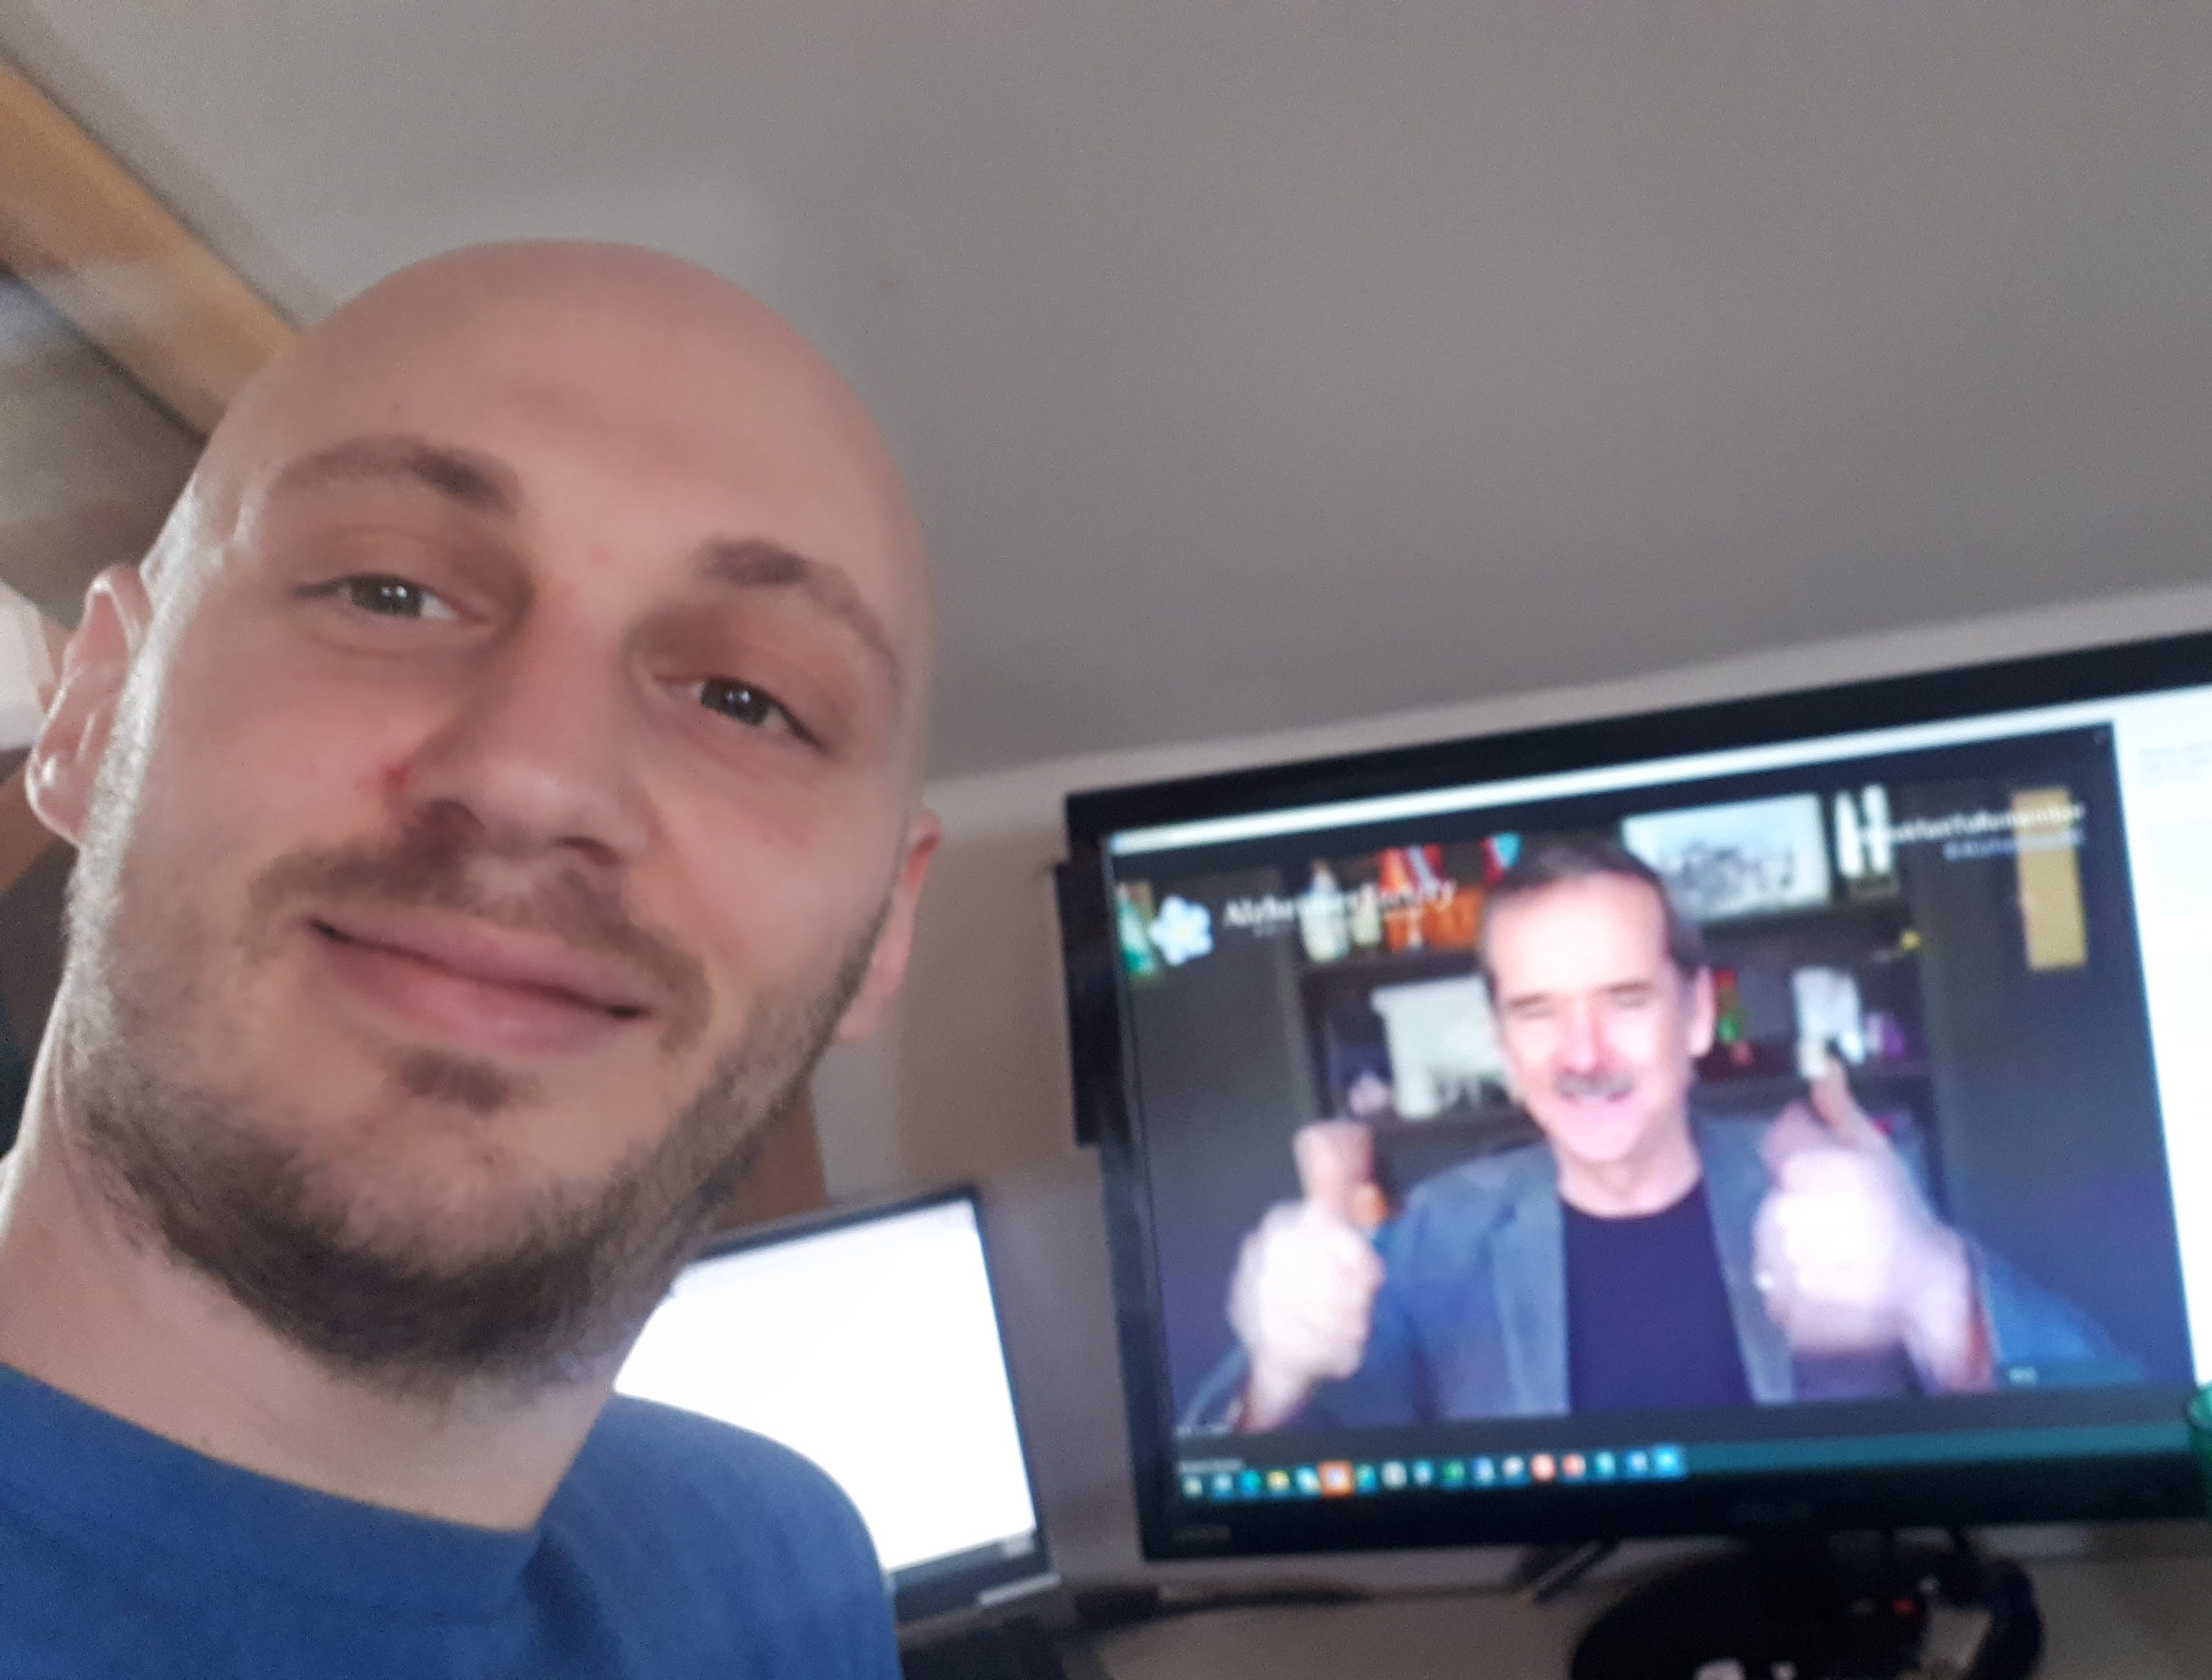

In [3]:
from IPython.display import Image
Image(r"./img/me_and_chris.jpg"
     , width=500)


Chris Hadfield and I on a Zoom call (Alzheimer's BC charity event)!

The dataset was extracted from here - https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS on 2024-10-16.

The aim of this project is to extract the data using Python/Pandas, see what kinda of data might be useful to extract, and then use Power BI to visualize the data.

## Data Import

In [6]:
import pandas as pd

Let's take a look at the data.

In [8]:
exoplanet_filepath = r'./dataset/exoplanet_dataset.csv'
unprocessed_df = pd.read_csv(exoplanet_filepath
                            ,skiprows=100)
unprocessed_df

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,DP Leo b,DP Leo,0,2,1,Eclipse Timing Variations,2009,Yunnan Astronomical Observatory,Published Confirmed,0,...,-0.0496,NaN,NaN,NaN,18.63330,0.015748,-0.015748,2014-05-16,2010-01,2014-05-16
1,DP Leo b,DP Leo,1,2,1,Eclipse Timing Variations,2009,Yunnan Astronomical Observatory,Published Confirmed,0,...,-0.0496,NaN,NaN,NaN,18.63330,0.015748,-0.015748,2014-05-14,2011-02,2014-05-14
2,HU Aqr AB b,HU Aqr,1,2,2,Eclipse Timing Variations,2011,Yunnan Astronomical Observatory,Published Confirmed,1,...,-0.3340,13.634,0.044,-0.044,16.47180,0.039434,-0.039434,2019-10-18,2011-06,2019-10-24
3,HU Aqr AB c,HU Aqr,1,2,2,Eclipse Timing Variations,2011,Yunnan Astronomical Observatory,Published Confirmed,1,...,-0.3340,13.634,0.044,-0.044,16.47180,0.039434,-0.039434,2019-10-18,2011-06,2019-10-24
4,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.0230,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36419,KPS-1 b,KPS-1,0,1,1,Transit,2018,Acton Sky Portal Observatory,Published Confirmed,0,...,-0.0920,10.931,0.017,-0.017,12.79330,0.000299,-0.000299,2024-03-04,2023-03,2024-03-04
36420,KPS-1 b,KPS-1,0,1,1,Transit,2018,Acton Sky Portal Observatory,Published Confirmed,0,...,-0.0920,10.931,0.017,-0.017,12.79330,0.000299,-0.000299,2022-05-03,2022-05,2022-05-03
36421,KPS-1 b,KPS-1,0,1,1,Transit,2018,Acton Sky Portal Observatory,Published Confirmed,0,...,-0.0920,10.931,0.017,-0.017,12.79330,0.000299,-0.000299,2022-01-24,2022-02,2022-01-24
36422,KPS-1 b,KPS-1,0,1,1,Transit,2018,Acton Sky Portal Observatory,TESS Project Candidate,0,...,-0.0920,10.931,0.017,-0.017,12.79330,0.000299,-0.000299,2022-08-08,2017-07,2022-08-08


Given that there are 92 columns, I have created a dictionary mapping column names to descriptions based on the CSV definitions and generated a function to review the data meaning as I go, called get_column_info.

In [10]:
column_info = {
    "pl_name": "Planet Name",
    "hostname": "Host Name",
    "default_flag": "Default Parameter Set",
    "sy_snum": "Number of Stars",
    "sy_pnum": "Number of Planets",
    "discoverymethod": "Discovery Method",
    "disc_year": "Discovery Year",
    "disc_facility": "Discovery Facility",
    "soltype": "Solution Type",
    "pl_controv_flag": "Controversial Flag",
    "pl_refname": "Planetary Parameter Reference",
    "pl_orbper": "Orbital Period [days]",
    "pl_orbpererr1": "Orbital Period Upper Unc. [days]",
    "pl_orbpererr2": "Orbital Period Lower Unc. [days]",
    "pl_orbperlim": "Orbital Period Limit Flag",
    "pl_orbsmax": "Orbit Semi-Major Axis [au]",
    "pl_orbsmaxerr1": "Orbit Semi-Major Axis Upper Unc. [au]",
    "pl_orbsmaxerr2": "Orbit Semi-Major Axis Lower Unc. [au]",
    "pl_orbsmaxlim": "Orbit Semi-Major Axis Limit Flag",
    "pl_rade": "Planet Radius [Earth Radius]",
    "pl_radeerr1": "Planet Radius Upper Unc. [Earth Radius]",
    "pl_radeerr2": "Planet Radius Lower Unc. [Earth Radius]",
    "pl_radelim": "Planet Radius Limit Flag",
    "pl_radj": "Planet Radius [Jupiter Radius]",
    "pl_radjerr1": "Planet Radius Upper Unc. [Jupiter Radius]",
    "pl_radjerr2": "Planet Radius Lower Unc. [Jupiter Radius]",
    "pl_radjlim": "Planet Radius Limit Flag",
    "pl_bmasse": "Planet Mass or Mass*sin(i) [Earth Mass]",
    "pl_bmasseerr1": "Planet Mass or Mass*sin(i) [Earth Mass] Upper Unc.",
    "pl_bmasseerr2": "Planet Mass or Mass*sin(i) [Earth Mass] Lower Unc.",
    "pl_bmasselim": "Planet Mass or Mass*sin(i) [Earth Mass] Limit Flag",
    "pl_bmassj": "Planet Mass or Mass*sin(i) [Jupiter Mass]",
    "pl_bmassjerr1": "Planet Mass or Mass*sin(i) [Jupiter Mass] Upper Unc.",
    "pl_bmassjerr2": "Planet Mass or Mass*sin(i) [Jupiter Mass] Lower Unc.",
    "pl_bmassjlim": "Planet Mass or Mass*sin(i) [Jupiter Mass] Limit Flag",
    "pl_bmassprov": "Planet Mass or Mass*sin(i) Provenance",
    "pl_orbeccen": "Eccentricity",
    "pl_orbeccenerr1": "Eccentricity Upper Unc.",
    "pl_orbeccenerr2": "Eccentricity Lower Unc.",
    "pl_orbeccenlim": "Eccentricity Limit Flag",
    "pl_insol": "Insolation Flux [Earth Flux]",
    "pl_insolerr1": "Insolation Flux Upper Unc. [Earth Flux]",
    "pl_insolerr2": "Insolation Flux Lower Unc. [Earth Flux]",
    "pl_insollim": "Insolation Flux Limit Flag",
    "pl_eqt": "Equilibrium Temperature [K]",
    "pl_eqterr1": "Equilibrium Temperature Upper Unc. [K]",
    "pl_eqterr2": "Equilibrium Temperature Lower Unc. [K]",
    "pl_eqtlim": "Equilibrium Temperature Limit Flag",
    "ttv_flag": "Data show Transit Timing Variations",
    "st_refname": "Stellar Parameter Reference",
    "st_spectype": "Spectral Type",
    "st_teff": "Stellar Effective Temperature [K]",
    "st_tefferr1": "Stellar Effective Temperature Upper Unc. [K]",
    "st_tefferr2": "Stellar Effective Temperature Lower Unc. [K]",
    "st_tefflim": "Stellar Effective Temperature Limit Flag",
    "st_rad": "Stellar Radius [Solar Radius]",
    "st_raderr1": "Stellar Radius Upper Unc. [Solar Radius]",
    "st_raderr2": "Stellar Radius Lower Unc. [Solar Radius]",
    "st_radlim": "Stellar Radius Limit Flag",
    "st_mass": "Stellar Mass [Solar mass]",
    "st_masserr1": "Stellar Mass Upper Unc. [Solar mass]",
    "st_masserr2": "Stellar Mass Lower Unc. [Solar mass]",
    "st_masslim": "Stellar Mass Limit Flag",
    "st_met": "Stellar Metallicity [dex]",
    "st_meterr1": "Stellar Metallicity Upper Unc. [dex]",
    "st_meterr2": "Stellar Metallicity Lower Unc. [dex]",
    "st_metlim": "Stellar Metallicity Limit Flag",
    "st_metratio": "Stellar Metallicity Ratio",
    "st_logg": "Stellar Surface Gravity [log10(cm/s**2)]",
    "st_loggerr1": "Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]",
    "st_loggerr2": "Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]",
    "st_logglim": "Stellar Surface Gravity Limit Flag",
    "sy_refname": "System Parameter Reference",
    "rastr": "RA [sexagesimal]",
    "ra": "RA [deg]",
    "decstr": "Dec [sexagesimal]",
    "dec": "Dec [deg]",
    "sy_dist": "Distance [pc]",
    "sy_disterr1": "Distance [pc] Upper Unc",
    "sy_disterr2": "Distance [pc] Lower Unc",
    "sy_vmag": "V (Johnson) Magnitude",
    "sy_vmagerr1": "V (Johnson) Magnitude Upper Unc",
    "sy_vmagerr2": "V (Johnson) Magnitude Lower Unc",
    "sy_kmag": "Ks (2MASS) Magnitude",
    "sy_kmagerr1": "Ks (2MASS) Magnitude Upper Unc",
    "sy_kmagerr2": "Ks (2MASS) Magnitude Lower Unc",
    "sy_gaiamag": "Gaia Magnitude",
    "sy_gaiamagerr1": "Gaia Magnitude Upper Unc",
    "sy_gaiamagerr2": "Gaia Magnitude Lower Unc",
    "rowupdate": "Date of Last Update",
    "pl_pubdate": "Planetary Parameter Reference Publication Date",
    "releasedate": "Release Date"
}




In [11]:
def get_column_info(column_name):
    return column_info.get(column_name, "Column information not found.")

In [12]:
# Example:
get_column_info("pl_orbsmax")

'Orbit Semi-Major Axis [au]'

## Data Review

I am going to take a brief look at the data and see how it looks.

In [14]:
unprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36424 entries, 0 to 36423
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          36424 non-null  object 
 1   hostname         36424 non-null  object 
 2   default_flag     36424 non-null  int64  
 3   sy_snum          36424 non-null  int64  
 4   sy_pnum          36424 non-null  int64  
 5   discoverymethod  36424 non-null  object 
 6   disc_year        36424 non-null  int64  
 7   disc_facility    36424 non-null  object 
 8   soltype          36424 non-null  object 
 9   pl_controv_flag  36424 non-null  int64  
 10  pl_refname       36424 non-null  object 
 11  pl_orbper        33266 non-null  float64
 12  pl_orbpererr1    31726 non-null  float64
 13  pl_orbpererr2    31725 non-null  float64
 14  pl_orbperlim     33266 non-null  float64
 15  pl_orbsmax       20008 non-null  float64
 16  pl_orbsmaxerr1   5547 non-null   float64
 17  pl_orbsmaxer

In [15]:
unprocessed_df.describe()

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,36424.000000,36424.000000,36424.000000,36424.000000,36424.000000,3.326600e+04,3.172600e+04,3.172500e+04,33266.000000,20008.000000,...,34755.000000,35722.000000,35709.000000,35708.000000,35710.000000,35481.000000,35481.000000,35423.000000,35423.000000,35423.000000
mean,0.158302,1.086152,1.881864,2015.400697,0.001977,1.312447e+04,1.519305e+04,-3.578568e+03,-0.000240,5.016227,...,-36.756705,13.592333,0.117107,-0.117736,11.569429,0.036168,-0.035651,13.357780,0.000526,-0.000526
std,0.365029,0.310858,1.204266,3.891674,0.044417,2.205352e+06,2.638892e+06,5.627286e+05,0.020514,189.417747,...,173.087483,2.431927,0.151954,0.182827,2.335484,0.205936,0.197648,2.368076,0.001109,0.001109
min,0.000000,1.000000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,...,-2900.000000,0.872000,0.001000,-12.270000,-3.044000,0.011000,-11.140000,2.364310,0.000118,-0.063232
25%,0.000000,1.000000,1.000000,2014.000000,0.000000,4.361288e+00,8.000000e-06,-2.003000e-04,0.000000,0.054192,...,-21.340000,12.597000,0.046000,-0.137000,10.726000,0.020000,-0.034000,12.383300,0.000255,-0.000508
50%,0.000000,1.000000,1.000000,2016.000000,0.000000,1.034969e+01,3.824000e-05,-3.829000e-05,0.000000,0.100600,...,-7.774000,14.204000,0.092000,-0.092000,12.288000,0.024000,-0.024000,14.017800,0.000356,-0.000356
75%,0.000000,1.000000,2.000000,2016.000000,0.000000,2.667570e+01,2.003000e-04,-8.000000e-06,0.000000,0.219300,...,-2.188000,15.284000,0.137000,-0.046000,13.175000,0.034000,-0.020000,15.057100,0.000508,-0.000255
max,1.000000,4.000000,8.000000,2024.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,19000.000000,...,2700.000000,45.340000,11.000000,-0.001000,35.330000,9.995000,-0.011000,20.186100,0.063232,-0.000118


Looking at the null values in the columns, and the sheer volume of columns, to keep my visualization clean, it is clear that I am going to want to start cutting some of these out.

## Data Visual Ideas

Some ideas that I think might be fun to visualize include:
- Discovery Timeline - how often we are discovering planets and by methods/facilities.
- Discovery Method by Year - Understand how reliance on different discovery techniques has changed, possibly reflecting technological advancements.
- Star System Complexity - to help understand common configurations in multi-planet or multi-star systems.
- Exoplanet Orbital Characteristics - Show how orbital period and distance vary across different exoplanets and explore any visible patterns based on the discovery method.
- Planetary Size Distribution - Segment by discovery method or discovery facility to understand how these factors affect detected planet sizes.
- Goldilocks Zone Analysis - Identify potential habitable zones by visualizing pl_insol (Insolation Flux) and pl_eqt (Equilibrium Temperature). Perhaps identify Earth-like planets.
- Controversial Exoplanets Count - Slicer by disc_year or discoverymethod to see if controversy correlates with certain periods or methods.


Based on reviewing the fields above, I am going to use the following fields for the following visuals:

1. Discovery Timeline

    Fields: disc_year (Discovery Year), discoverymethod (Discovery Method), disc_facility (Discovery Facility)
    Reasons:
        disc_year provides the timeline for discoveries, allowing for the frequency of planet discoveries over time.
        discoverymethod enables segmentation by method, revealing changes or trends in detection technology.
        disc_facility shows which facilities contributed to discoveries, helping to identify active research centers over time.

2. Discovery Method by Year

    Fields: disc_year (Discovery Year), discoverymethod (Discovery Method)
    Reasons:
        disc_year is essential for displaying discoveries over time.
        discoverymethod indicates how discovery techniques have evolved, reflecting advancements in technology or changes in research focus.

3. Star System Complexity

    Fields: sy_snum (Number of Stars), sy_pnum (Number of Planets)
    Reasons:
        sy_snum gives the number of stars in each system, which helps understand system complexity (e.g., binary or multi-star systems).
        sy_pnum provides the number of planets, showing the density of planets within different types of star systems.

4. Exoplanet Orbital Characteristics

    Fields: pl_orbper (Orbital Period), pl_orbsmax (Orbit Semi-Major Axis), pl_rade (Planet Radius), discoverymethod (Discovery Method)
    Reasons:
        pl_orbper and pl_orbsmax give orbital characteristics (period and semi-major axis), which can reveal trends in planetary system architecture.
        pl_rade (size) adds context on how orbital characteristics may vary by planet size.
        discoverymethod adds layers of comparison, showing if certain methods are better suited for planets with specific orbital features.

5. Goldilocks Zone Analysis

    Fields: pl_insol (Insolation Flux), pl_eqt (Equilibrium Temperature)
    Reasons:
        pl_insol measures how much solar energy a planet receives, crucial for evaluating potential habitability.
        pl_eqt shows equilibrium temperature, another key factor in determining if a planet might fall within a “habitable” or Earth-like temperature range.

6. Controversial Exoplanets Count

    Fields: pl_controv_flag (Controversial Flag), disc_year (Discovery Year), discoverymethod (Discovery Method)
    Reasons:
        pl_controv_flag indicates whether a planet’s data or existence is disputed, showing the proportion of controversial discoveries.
        disc_year and discoverymethod are ideal for slicing, allowing you to see if controversies are linked to certain years or methods, perhaps due to the evolving nature of detection techniques.

Some extra fields that will want for reference (like planet names, or planet mass) or filters for the dataset (like soltype) - will be added too.

I noticed that each planet can have many observations and the default flag is set to the latest observation. Therefore I will filter my data to include the default_flag == 1.
It is important to note that the default flag represents the latest data collected for the planet and not the discovery date - therefore I will include both.

In [20]:
get_column_info('pl_bmasse')

'Planet Mass or Mass*sin(i) [Earth Mass]'

## Field Selection

In [21]:
selected_fields_df = unprocessed_df[['disc_year'
                                 , 'releasedate'
                                 , 'pl_name'
                                 , 'hostname'
                                 , 'discoverymethod'
                                 , 'disc_facility'
                                 , 'sy_snum'
                                 , 'sy_pnum'
                                 , 'pl_orbper'
                                 , 'pl_orbsmax'
                                 , 'pl_rade'
                                 , 'pl_insol'
                                 , 'pl_eqt'
                                 , 'pl_controv_flag'
                                 , 'pl_bmasse'
                                 , 'soltype'
                                 , 'default_flag']]

selected_fields_df = selected_fields_df[selected_fields_df['default_flag'] == 1]

Let's take a look at the data around the selected fields.

In [23]:
selected_fields_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5766 entries, 1 to 36418
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   disc_year        5766 non-null   int64  
 1   releasedate      5766 non-null   object 
 2   pl_name          5766 non-null   object 
 3   hostname         5766 non-null   object 
 4   discoverymethod  5766 non-null   object 
 5   disc_facility    5766 non-null   object 
 6   sy_snum          5766 non-null   int64  
 7   sy_pnum          5766 non-null   int64  
 8   pl_orbper        5484 non-null   float64
 9   pl_orbsmax       3549 non-null   float64
 10  pl_rade          4335 non-null   float64
 11  pl_insol         728 non-null    float64
 12  pl_eqt           1447 non-null   float64
 13  pl_controv_flag  5766 non-null   int64  
 14  pl_bmasse        2720 non-null   float64
 15  soltype          5766 non-null   object 
 16  default_flag     5766 non-null   int64  
dtypes: float64(6), int

In [24]:
selected_fields_df.describe()

,disc_year,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_insol,pl_eqt,pl_controv_flag,pl_bmasse,default_flag
count,5766.000000,5766.000000,5766.000000,5.484000e+03,3549.000000,4335.000000,728.000000,1447.000000,5766.000000,2720.000000,5766.0
mean,2016.429240,1.103885,1.765522,7.798129e+04,24.526979,4.307183,432.002582,1010.902557,0.005203,766.974870,1.0
std,4.658775,0.344143,1.149907,5.431004e+06,446.642783,4.738505,1851.670131,546.607257,0.071950,1463.967467,0.0
min,1992.000000,1.000000,1.000000,9.070629e-02,0.004400,0.310000,0.020000,50.000000,0.000000,0.020000,1.0
25%,2014.000000,1.000000,1.000000,4.409349e+00,0.054750,1.609000,7.420000,586.000000,0.000000,13.395000,1.0
50%,2016.000000,1.000000,1.000000,1.135562e+01,0.116200,2.390000,52.160000,903.000000,0.000000,184.340480,1.0
75%,2020.000000,1.000000,2.000000,4.003764e+01,0.807000,3.750000,332.500000,1382.000000,0.000000,731.005340,1.0
max,2024.000000,4.000000,8.000000,4.020000e+08,19000.000000,77.342000,44900.000000,4050.000000,1.000000,9534.900000,1.0


Seeing the null values and reviewing the data, I did consider filling in the blanks with averages but I don't think that would be right since this dataset was obtained through the scientific method which presumably  underwent considerable scrutiny. I will instead leave it blank.


## Data Transformations

I will make sure the year of the discovery is converted into a date format to make it easier for Power BI to recognize it.

In [27]:
selected_fields_df['disc_year'] = selected_fields_df['disc_year'].astype(str) + '-01-01'
selected_fields_df

,disc_year,releasedate,pl_name,hostname,discoverymethod,disc_facility,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_insol,pl_eqt,pl_controv_flag,pl_bmasse,soltype,default_flag
1,2009-01-01,2014-05-14,DP Leo b,DP Leo,Eclipse Timing Variations,Yunnan Astronomical Observatory,2,1,10220.000000,8.19000,NaN,NaN,NaN,0,1922.79000,Published Confirmed,1
2,2011-01-01,2019-10-24,HU Aqr AB b,HU Aqr,Eclipse Timing Variations,Yunnan Astronomical Observatory,2,2,2390.000000,3.60000,NaN,NaN,NaN,1,1875.19700,Published Confirmed,1
3,2011-01-01,2019-10-24,HU Aqr AB c,HU Aqr,Eclipse Timing Variations,Yunnan Astronomical Observatory,2,2,4368.000000,5.40000,NaN,NaN,NaN,1,1430.23500,Published Confirmed,1
6,2007-01-01,2023-09-19,11 Com b,11 Com,Radial Velocity,Xinglong Station,2,1,323.210000,1.17800,NaN,NaN,NaN,0,4914.89849,Published Confirmed,1
8,2008-01-01,2023-09-19,HD 173416 b,HD 173416,Radial Velocity,Xinglong Station,1,1,322.030000,1.15800,NaN,NaN,NaN,0,585.12210,Published Confirmed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36408,2005-01-01,2014-05-14,HD 73526 c,HD 73526,Radial Velocity,Anglo-Australian Telescope,1,2,379.100000,1.03000,NaN,NaN,NaN,0,715.09000,Published Confirmed,1
36410,2002-01-01,2018-09-06,HD 76700 b,HD 76700,Radial Velocity,Anglo-Australian Telescope,1,1,3.970970,0.05000,NaN,NaN,NaN,0,66.74430,Published Confirmed,1
36415,2016-01-01,2019-06-27,WASP-87 b,WASP-87,Transit,Anglo-Australian Telescope,2,1,1.682795,0.02946,15.524,NaN,NaN,0,692.86940,Published Confirmed,1
36417,2021-01-01,2021-10-04,GPX-1 b,GPX-1,Transit,Acton Sky Portal Observatory,1,1,1.744579,0.03380,16.477,4650.0,2300.0,0,6261.21962,Published Confirmed,1


## Gravitational Constant Calculations

While I was creating my visuals, I realised that having an approximation of the planet's gravity would be useful for the Goldilocks zone analysis. Checking online, I see the formula - https://en.wikipedia.org/wiki/Gravitational_constant - 

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$$



In [30]:
# Constants
G = 6.674 * 10**-11  # Gravitational constant
M_earth = 5.972 * 10**24  # Earth's mass in kg - https://en.wikipedia.org/wiki/Earth_mass
R_earth = 6.371 * 10**6   # Earth's radius in meters - https://en.wikipedia.org/wiki/Earth_radius

Let's verify this to be accurate by plugging in Earth values and getting 9.81 m/s² - https://en.wikipedia.org/wiki/Gravity_of_Earth. 

In [58]:
get_column_info('pl_insol')

'Insolation Flux [Earth Flux]'

In [32]:
earth_gravity = (G * M_earth) / (R_earth ** 2)
print(earth_gravity)

9.819532032815959


Now we know this is correctly Earth's gravity in meters per second squared, we can plug in the values of the planets (where known) - to come up with multiples of their gravity and divide it by Earth's gravity to see what multiple of Earth's gravity is.

In [34]:
# Calculate surface gravity using pl_bmasse (mass in Earth Masses) and pl_rade (radius in Earth Radii)
selected_fields_df['gravity_multiple_of_earths_gravity'] = (G * (selected_fields_df['pl_bmasse'] * M_earth)) / ((selected_fields_df['pl_rade'] * R_earth) ** 2) / earth_gravity

In [35]:
selected_fields_df

,disc_year,releasedate,pl_name,hostname,discoverymethod,disc_facility,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_insol,pl_eqt,pl_controv_flag,pl_bmasse,soltype,default_flag,gravity_multiple_of_earths_gravity
1,2009-01-01,2014-05-14,DP Leo b,DP Leo,Eclipse Timing Variations,Yunnan Astronomical Observatory,2,1,10220.000000,8.19000,NaN,NaN,NaN,0,1922.79000,Published Confirmed,1,NaN
2,2011-01-01,2019-10-24,HU Aqr AB b,HU Aqr,Eclipse Timing Variations,Yunnan Astronomical Observatory,2,2,2390.000000,3.60000,NaN,NaN,NaN,1,1875.19700,Published Confirmed,1,NaN
3,2011-01-01,2019-10-24,HU Aqr AB c,HU Aqr,Eclipse Timing Variations,Yunnan Astronomical Observatory,2,2,4368.000000,5.40000,NaN,NaN,NaN,1,1430.23500,Published Confirmed,1,NaN
6,2007-01-01,2023-09-19,11 Com b,11 Com,Radial Velocity,Xinglong Station,2,1,323.210000,1.17800,NaN,NaN,NaN,0,4914.89849,Published Confirmed,1,NaN
8,2008-01-01,2023-09-19,HD 173416 b,HD 173416,Radial Velocity,Xinglong Station,1,1,322.030000,1.15800,NaN,NaN,NaN,0,585.12210,Published Confirmed,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36408,2005-01-01,2014-05-14,HD 73526 c,HD 73526,Radial Velocity,Anglo-Australian Telescope,1,2,379.100000,1.03000,NaN,NaN,NaN,0,715.09000,Published Confirmed,1,NaN
36410,2002-01-01,2018-09-06,HD 76700 b,HD 76700,Radial Velocity,Anglo-Australian Telescope,1,1,3.970970,0.05000,NaN,NaN,NaN,0,66.74430,Published Confirmed,1,NaN
36415,2016-01-01,2019-06-27,WASP-87 b,WASP-87,Transit,Anglo-Australian Telescope,2,1,1.682795,0.02946,15.524,NaN,NaN,0,692.86940,Published Confirmed,1,2.875041
36417,2021-01-01,2021-10-04,GPX-1 b,GPX-1,Transit,Acton Sky Portal Observatory,1,1,1.744579,0.03380,16.477,4650.0,2300.0,0,6261.21962,Published Confirmed,1,23.062302


## Data Extraction

In [36]:
selected_fields_df.drop(columns='default_flag'
                        ,inplace=True)
selected_fields_df['releasedate'] = pd.to_datetime(selected_fields_df['releasedate'], format='mixed', dayfirst=True, errors='coerce').dt.date
processed_filepath = r'./dataset/processed_exoplanet_dataset.csv'
selected_fields_df.to_csv(processed_filepath)

I think this dataset is ready to be used for Power BI.

## Download a copy of the data extract

[Download the CSV file.](./dataset/processed_exoplanet_dataset.csv)


## Download the Power BI Visual

I have used the data extracted from above to create a simple but well-made Power BI series of dashboards which you can [view here](https://app.powerbi.com/view?r=eyJrIjoiYWE2NDc5NjYtYzU4OC00N2ViLTg5MzktNDIzNTliMjk5Zjk2IiwidCI6IjNiN2IzYmM0LWQyNWMtNDk5YS1hOWMwLTc1YWRkZTliYjAwZSJ9) or you can [Download the .pbix file here.](./Exoplanets.pbix)